## Problem 3 - Seasonal temperature anomalies, visualized (7 points)

![img/Seasonal_tempearatures.png](img/Seasonal_temperatures.png)<br/>
*The goal for this problem is to make this plot.*

For Problem 3, the goal is to recreate the plot above, a 4-panel plot showing seasonal temperature anomalies from 1953-2016.

### Steps


1: Read in the `helsinki.csv` data into Pandas similarly as in Problem 2. 

2: Create a variable `selection` and store the data into it covering months starting from January 1953 and up to the end of the year 2016 (last month should be December 2016). 

In [1]:
# Import the required libraries

import pandas as pd 
from matplotlib import pyplot as plt

# read the csv
data = pd.read_csv('helsinki.csv')
# Select the data according to the date
selection = data.loc[(data['DATE_m'] >= 195301) & (data['DATE_m'] <= 201612)]

In [2]:
# These test prints should print first five rows
print(data.head())
print(selection.head())

   DATE_m    TAVG  temp_celsius  Month  ref_temp   Diff
0  195201  29.478        -1.401      1    -5.351  3.950
1  195202  24.800        -4.000      2    -5.941  1.941
2  195203  13.808       -10.107      3    -2.440 -7.666
3  195204  39.607         4.226      4     3.424  0.802
4  195205  44.667         7.037      5    10.180 -3.143
    DATE_m    TAVG  temp_celsius  Month  ref_temp   Diff
12  195301  22.286        -5.397      1    -5.351 -0.046
13  195302  16.407        -8.663      2    -5.941 -2.721
14  195303  31.130        -0.483      3    -2.440  1.957
15  195304  39.963         4.424      4     3.424  1.000
16  195305  48.677         9.265      5    10.180 -0.915


2: Create four variables (`winter`, `spring`, `summer`, and `fall`) and store rows from the `selection` DataFrame into those variables that meet following criteria: 

  - **`winter`** DataFrame should cover months from December to February
  - **`spring`** DataFrame should cover months from March to May
  - **`summer`** DataFrame should cover months from June to August
  - **`fall`** DataFrame should cover months from September to November

Hint: Take advantage of the information stored in column **`Month`** in the `selection` DataFrame.
  
**Important**: Use lower case naming for the variables.

In [3]:
# Clasificate the seasons according to the months
winter = selection.loc[(selection['Month'] <= 2) | (selection['Month'] == 12)]
spring = selection.loc[(selection['Month'] >= 3) & (selection['Month'] <= 5)]
summer = selection.loc[(selection['Month'] >= 6) & (selection['Month'] <= 8)]
fall = selection.loc[(selection['Month'] >= 9) & (selection['Month'] <= 11)]


In [4]:
# These test prints should print first 3 rows of each DataFrame
print(winter.head(3))
print(spring.head(3))
print(summer.head(3))
print(fall.head(3))

    DATE_m    TAVG  temp_celsius  Month  ref_temp   Diff
12  195301  22.286        -5.397      1    -5.351 -0.046
13  195302  16.407        -8.663      2    -5.941 -2.721
23  195312  29.677        -1.290     12    -3.211  1.921
    DATE_m    TAVG  temp_celsius  Month  ref_temp   Diff
14  195303  31.130        -0.483      3    -2.440  1.957
15  195304  39.963         4.424      4     3.424  1.000
16  195305  48.677         9.265      5    10.180 -0.915
    DATE_m    TAVG  temp_celsius  Month  ref_temp   Diff
17  195306  62.667        17.037      6    14.668  2.369
18  195307  62.720        17.067      7    17.281 -0.214
19  195308  59.207        15.115      8    15.604 -0.489
    DATE_m    TAVG  temp_celsius  Month  ref_temp   Diff
20  195309  49.370         9.650      9    10.596 -0.946
21  195310  45.000         7.222     10     5.488  1.734
22  195311  34.536         1.409     11     0.646  0.763


Next we want to aggregate the temperature anomalies (in column `Diff`) into yearly averages. Hence, for each season in each year you should have a single mean value. 

**3:** Create four emplty DataFrames (called `winter_agg`, `spring_agg`, `summer_agg` and `fall_agg`) that should in the end contain the yearly mean temperatures of the `Diff` temperatures (*temperature anomalies*) from different seasons. Hence, you should group the values from the DataFrames made in the last step 2 (separately for each season) and calculate the annual mean of each season based on `Diff` -column that you store into the new DataFrames `winter_agg`, `spring_agg`, `summer_agg` and `fall_agg`. **Note:** In this step it is okay (and expected) that you create four different loops when iterating over the groups of different seasons.

  - Each DataFrame should have columns `year` and `mean_anomaly`.


Hint: This follows closely the idea in Exercise-6 where the values were grouped and aggregated into hourly or daily mean values. Hence, you might want to first parse the year information from the `DATE_m` column. 

In [5]:
# Initiliaze the dataframes
winter_agg = pd.DataFrame()
spring_agg = pd.DataFrame()
summer_agg = pd.DataFrame()
fall_agg = pd.DataFrame()

# Group the data and get the mean 

""" Winter """
# Slicing the data keeping just the year
winter.loc[:,'Year'] = winter['DATE_m'].astype(str)
winter.loc[:,'Year'] = winter['Year'].str.slice(start=0, stop=4)

grouped = winter.groupby('Year')

# Define the columns to be averaged 
mean_cols = ['Diff']
# Iterate over the groups
for key, group in grouped:
   # Aggregate the data
   mean_values = group[mean_cols].mean()

   # Add the ´key´ (i.e. the date+time information) into the aggregated values
   mean_values['Year'] = key

   # Append the aggregated values into the DataFrame
   winter_agg = winter_agg.append(mean_values, ignore_index=True)
    
    
""" Spring """
# Slicing the data keeping just the year
spring.loc[:,'Year'] = spring['DATE_m'].astype(str)
spring.loc[:,'Year'] = spring['Year'].str.slice(start=0, stop=4)

grouped = spring.groupby('Year')

# Define the columns to be averaged 
mean_cols = ['Diff']
# Iterate over the groups
for key, group in grouped:
   # Aggregate the data
   mean_values = group[mean_cols].mean()

   # Add the ´key´ (i.e. the date+time information) into the aggregated values
   mean_values['Year'] = key

   # Append the aggregated values into the DataFrame
   spring_agg = spring_agg.append(mean_values, ignore_index=True)
    
""" Summer """
# Slicing the data keeping just the year
summer.loc[:,'Year'] = summer['DATE_m'].astype(str)
summer.loc[:,'Year'] = summer['Year'].str.slice(start=0, stop=4)

grouped = summer.groupby('Year')

# Define the columns to be averaged 
mean_cols = ['Diff']
# Iterate over the groups
for key, group in grouped:
   # Aggregate the data
   mean_values = group[mean_cols].mean()

   # Add the ´key´ (i.e. the date+time information) into the aggregated values
   mean_values['Year'] = key

   # Append the aggregated values into the DataFrame
   summer_agg = summer_agg.append(mean_values, ignore_index=True)   
    
""" Fall """
# Slicing the data keeping just the year
fall.loc[:,'Year'] = fall['DATE_m'].astype(str)
fall.loc[:,'Year'] = fall['Year'].str.slice(start=0, stop=4)

grouped = fall.groupby('Year')

# Define the columns to be averaged 
mean_cols = ['Diff']
# Iterate over the groups
for key, group in grouped:
   # Aggregate the data
   mean_values = group[mean_cols].mean()

   # Add the ´key´ (i.e. the date+time information) into the aggregated values
   mean_values['Year'] = key

   # Append the aggregated values into the DataFrame
   fall_agg = fall_agg.append(mean_values, ignore_index=True)
    

C:\Users\Adorian\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Adorian\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [6]:
# Eliminate the rows with NaN Values 
winter_agg.dropna()
spring_agg.dropna()
summer_agg.dropna()
fall_agg.dropna()

,Diff,Year
0,0.517000,1953
1,-0.069333,1954
2,0.359667,1955
3,-2.793333,1956
4,-0.294667,1957
5,0.991000,1958
6,-0.581000,1959
7,-1.341333,1960
8,1.123333,1961
9,0.310667,1962


In [7]:
# These test prints should print data from first 5 years of each DataFrame
print(winter_agg.head())
print(spring_agg.head())
print(summer_agg.head())
print(fall_agg.head())

       Diff  Year
0 -0.282000  1953
1 -1.392000  1954
2 -3.441667  1955
3 -3.544000  1956
4  2.173000  1957
       Diff  Year
0  0.680667  1953
1  0.145000  1954
2 -3.950000  1955
3 -2.426667  1956
4 -2.846333  1957
       Diff  Year
0  0.555333  1953
1 -0.521333  1954
2  0.253333  1955
3 -1.257333  1956
4 -0.650667  1957
       Diff  Year
0  0.517000  1953
1 -0.069333  1954
2  0.359667  1955
3 -2.793333  1956
4 -0.294667  1957


4: Create a figure with 4 subplots in the arrangement shown above, labeling axes as needed, with gridlines on, and with a line legend for each panel.

 - You can find tips about these different plot features in the [Matplotlib documentation](https://matplotlib.org/contents.html).

Text(0, 0.5, 'Temperature [ºC]')

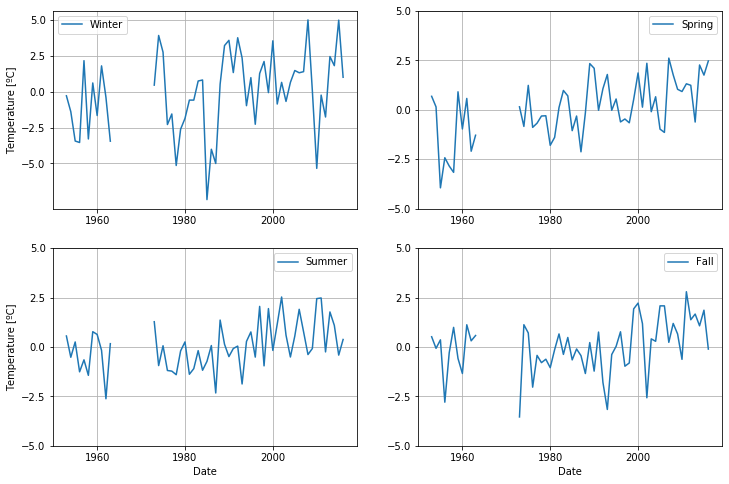

In [8]:
# Create the plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8));

# Set the position of the plots 
ax11 = axes[0][0]
ax12 = axes[0][1]
ax21 = axes[1][0]
ax22 = axes[1][1]

# Set plot line width
line_width = 1.5

# Plot data
ax11.plot(winter_agg['Year'], winter_agg['Diff'], lw=line_width)
ax12.plot(spring_agg['Year'], spring_agg['Diff'], lw=line_width)
ax21.plot(summer_agg['Year'], summer_agg['Diff'], lw=line_width)
ax22.plot(fall_agg['Year'], fall_agg['Diff'], lw=line_width)

# Set additional features 
ax11.set_yticks([-5,-2.5,0,2.5,5])
ax12.set_yticks([-5,-2.5,0,2.5,5])
ax21.set_yticks([-5,-2.5,0,2.5,5])
ax22.set_yticks([-5,-2.5,0,2.5,5])

ax11.set_xticks([7,27, 47])
ax12.set_xticks([7,27, 47])
ax21.set_xticks([7,27, 47])
ax22.set_xticks([7,27, 47])
# Turn plot grids on
ax11.grid()
ax12.grid()
ax21.grid()
ax22.grid()

# Add a legend for every plot 
ax11.legend(['Winter'])
ax12.legend(['Spring'])
ax21.legend(['Summer'])
ax22.legend(['Fall'])

# Axis labels
ax21.set_xlabel('Date')
ax22.set_xlabel('Date')
ax11.set_ylabel('Temperature [ºC]')
ax21.set_ylabel('Temperature [ºC]')

# Display figure


5: Save your plot as PNG file into disk with filename `seasonal_temperatures.png` 

In [9]:
# Save image
name = 'seasonal_temperatures.png'
fig.savefig(name)

# Problem 4 - Bar-plot for seasonal temperature anomalies (6 points)

In this problem the aim is to create a single plot where the temperature anomalies for different seasons of the year 2012 are visualized with barplot. The result figure should look something like following where temperatures above 0 degrees are plotted with red color, and the temperatures below or equal to zero degree are plotted with blue color:

![seasonal anomalies](img/seasonal_anomalies.png)

## Steps

**1:** Create variables `wi`, `sp`, `su`, and `fa` that corresponds to different seasons (namely winter, spring, summer and fall). You should store for each of these variables the **mean anomaly temperature** for each season of the year **2012**. 

**Hint:** You can get those values from `mean_anomaly` column from the DataFrames created at the end of Problem 3 (i.e. winter_agg, spring_agg, etc.).

In [10]:
# Save the value of every season of 2012
wi = winter_agg.loc[(winter_agg['Year'] == '2012'), 'Diff'].values[0]
sp = spring_agg.loc[(spring_agg['Year'] == '2012'), 'Diff'].values[0]
su = summer_agg.loc[(summer_agg['Year'] == '2012'), 'Diff'].values[0]
fa = fall_agg.loc[(fall_agg['Year'] == '2012'), 'Diff'].values[0]

**2:** Create a list called `seasons` with four values: `wi`, `sp`, `su` and `fa`. 

In [11]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
seasons = [wi, sp, su, fa]

In [12]:
# This test print should print four values from the list
print(seasons)

[-1.7626666666666668, 1.2373333333333332, -0.2503333333333333, 1.376666666666667]


**3:** Visualize the anomalies:

   - Initialize the **figure** and **ax** with Matplotlib's `plt.subplots()` -function. You do not need pass any parameters.
   - Use **`enumerate()`** -function to (for) loop over the values in **seasons** list. When looping, you should store the list value into a variable called **`season`**. By using `enumerate()` -function you will, in addition to the list value, also get the index. 
   - **Inside the loop**: 
      
       - Create a variable called `color`, and assign value **`"red"`** if the value in `season` is **higher than 0**, and **`"blue"`** in all other cases. 
       - Visualize the data with bar plot by using the Matplotlib's `bar()` -function. The **x** -parameter should be the **index** of the `seasons` list (the one you are iterating over), and the **y** -parameter should be the temperature value from **`season`** -variable, and the parameter **`width`** should be **`1.0`**.
       - Specify the value limits for y-axis: lower boundary should be **-6** and the higher boundary should be **6**. You should use the `set_ylim()` -function to do this (see lesson materials). 
       - Remove the x-axis ticks from the plot with command (you can just copy-paste this): `ax.set_xticks([], [])`
       - Give intuitive annotations for each bar: use `text()` -function to add following texts to specified positions:
          
          - Winter: at position `x=0` and `y=5.5` add text **`Wi`**
          - Spring: at position `x=1` and `y=5.5` add text **`Sp`**
          - Summer: at position `x=2` and `y=5.5` add text **`Su`**
          - Fall: at position `x=3` and `y=5.5` add text **`Fa`**
          
   
  - **After the loop**: 
       
       - Add title **`Seasonal weather anomalies in Helsinki`** to the plot. You can use parameter `fontsize=16` to adjust the fontsize to be the same as in example figure. 
       - Add xlabel **`2012`** to the plot. You can use parameter `fontsize=16` to adjust the fontsize to be the same as in example figure. 
       - Add ylabel **`Difference from long-term\naverage temperature (Celsius)`** to the plot. You can use parameter `fontsize=14` to adjust the fontsize to be the same as in example figure. 
       
       - Save the figure into disk with name `seasonal_anomalies_in_2012.png`

Text(0, 0.5, 'Difference from long-term\naverage temperature (Celsius)')

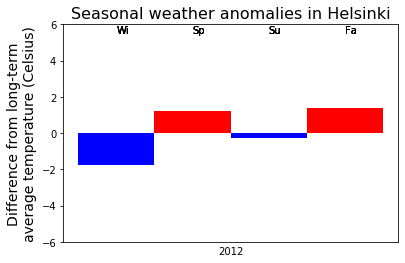

In [13]:
# Create plot
figure, ax = plt.subplots()

# loop for all the seasons
for season in enumerate(seasons):
    # Set color
    if season[1] > 0:
        color = 'red'
    else:
        color = 'blue'
    
    #Set features
    plt.bar(season[0], season[1], width =1.0, color = color)
    ax.set_ylim(-6, 6)
    ax.set_xticks([], [])
    # Set text
    plt.text(0, 5.5, 'Wi')
    plt.text(1, 5.5, 'Sp')
    plt.text(2, 5.5, 'Su')
    plt.text(3, 5.5, 'Fa')
# Add labels  
plt.title('Seasonal weather anomalies in Helsinki', fontsize=16)
plt.xlabel('2012')
plt.ylabel('Difference from long-term\naverage temperature (Celsius)', fontsize=14)


## Problem 5 - Seasonal temperature anomalies, animated (5 points)

![temp_anomaly_animation.gif](img/temp_anomaly_animation.gif)<br/>
*The goal for this problem is to make this kind of animation.*

**In Problem 5**, the goal is to recreate **64 individual bar plots** that can be animated like the animation above that shows the variation in seasonal temperature anomalies
from 1953-2016.

**The solution from Problem 4 gives a good starting for this problem**, as now we are producing many similar plots and automating the generation of those visualizations by looping over different years. The instructions repeats quite many of the steps from Problem 4, but **they include changes as well**. 

## Steps

Before starting, you might want to copy and paste your solution from Problem 4 into the cell below and start modifying that code.

 - Create variables `start_year` that should have the first year in the data (1953) and `stop_year` that should have the year when the loop is stopped (2017). 
 - Create a for loop using the `range()` function where you should iterate over the range of years specified in `start_year` and `stop_year`. When creating the loop assign the value of the iteration into a variable called **`year`**. 
 - **Inside the loop**:
     
     - Following the example from Problem 4, create variables `wi`, `sp`, `su`, and `fa` that corresponds to different seasons (namely winter, spring, summer and fall). You should store for each of these variables the **mean anomaly temperature** for each season of the **`year`** that you are looping over. 
     - Create a list called `seasons` with four values: `wi`, `sp`, `su` and `fa`. 
     
     - Initialize the **figure** and **ax** with Matplotlib's `plt.subplots()` -function. You do not need pass any parameters.
   - Use **`enumerate()`** -function to (for) loop over the values in **seasons** list. When looping, you should store the list value into a variable called **`season`**. By using `enumerate()` -function you will, in addition to the list value, also get the index. 
   
   - **Inside another (nested) loop**: 
      
       - Create a variable called `color`, and assign values according following criterias (**this is optional**, you can continue with the same colors and criteria as specified in Problem 4, i.e. blue-red):
           - if `season` value is **higher than 3** the color should get hex-color `'#b2182b'` ([what is hex color?](https://en.wikipedia.org/wiki/Web_colors#Hex_triplet))
           - if `season` value is **higher than 2 and below or equal to 3** the color should get hex-color `'#ef8a62'`
           - if `season` value is **higher or equal to 0 and below or equal to 2** the color should get hex-color `'#fddbc7'`
           - if `season` value is **lower or equal to -3 ** the color should get hex-color `'#fddbc7'`
           - if `season` value is **lower or equal to -2 and higher than -3** the color should get hex-color `'#67a9cf'`
           - if `season` value is **lower than 0 and higher than -2** the color should get hex-color `'#d1e5f0'`
           
       - Visualize the data with bar plot by using the Matplotlib's `bar()` -function. The **x** -parameter should be the **index** of the `seasons` list (the one you are iterating over), and the **y** -parameter should be the temperature value from **`season`** -variable, and the parameter **`width`** should be **`1.0`**.
       - Specify the value limits for y-axis: lower boundary should be **-6** and the higher boundary should be **6**. You should use the `set_ylim()` -function to do this (see lesson materials). 
       - Remove the x-axis ticks from the plot with command (you can just copy-paste this): `ax.set_xticks([], [])`
       - Give intuitive annotations for each bar: use `text()` -function to add following texts to specified positions:
          
          - Winter: at position `x=0` and `y=5.5` add text **`Wi`**
          - Spring: at position `x=1` and `y=5.5` add text **`Sp`**
          - Summer: at position `x=2` and `y=5.5` add text **`Su`**
          - Fall: at position `x=3` and `y=5.5` add text **`Fa`**
          
  - **After the nested loop (i.e. back to first-level loop)**: 
       
       - Add title **`Seasonal weather anomalies in Helsinki`** to the plot. You can use parameter `fontsize=16` to adjust the fontsize to be the same as in example figure. 
       - Add xlabel according to the **`year`** you are plotting. You can use parameter `fontsize=16` to adjust the fontsize to be the same as in example figure. 
       - Add ylabel **`Difference from long-term\naverage temperature (Celsius)`** to the plot. You can use parameter `fontsize=14` to adjust the fontsize to be the same as in example figure. 
       - Create a variable called **`outfp`** and store the name of output file into it following formula `seasonal_anomalies_in_YEARX.png` where the YEARX should be replaced with the year you are iterating over.
       - Save the figure into disk with output filename from `outfp`.


C:\Users\Adorian\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


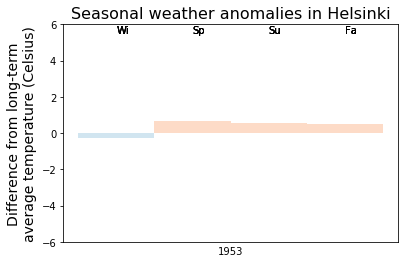

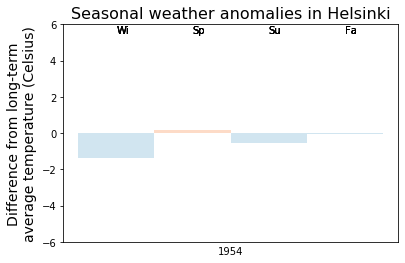

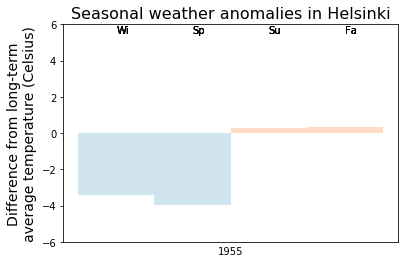

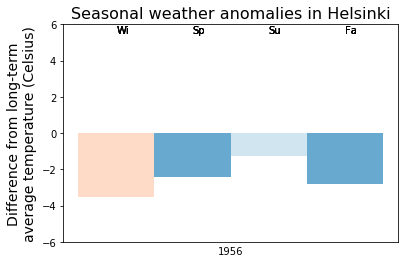

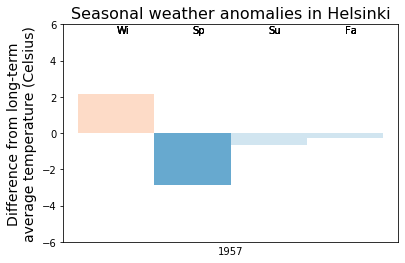

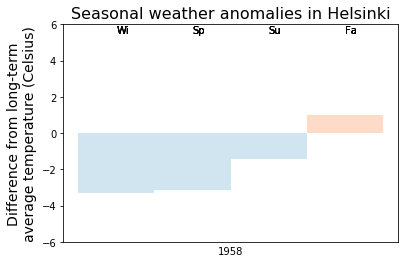

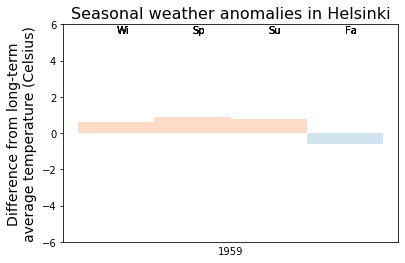

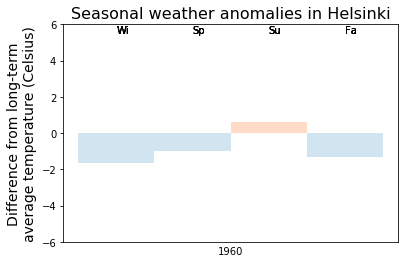

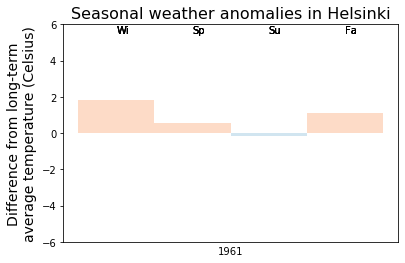

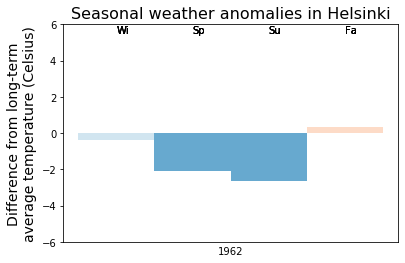

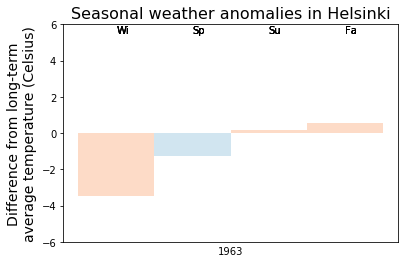

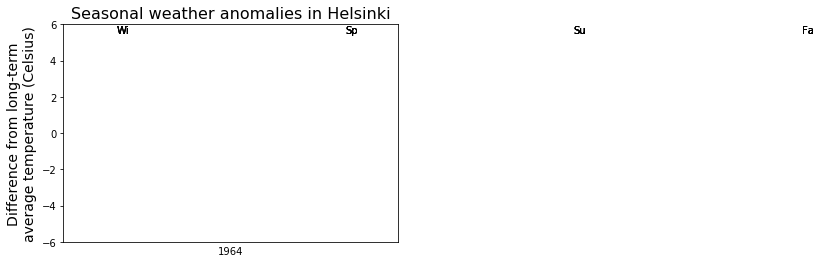

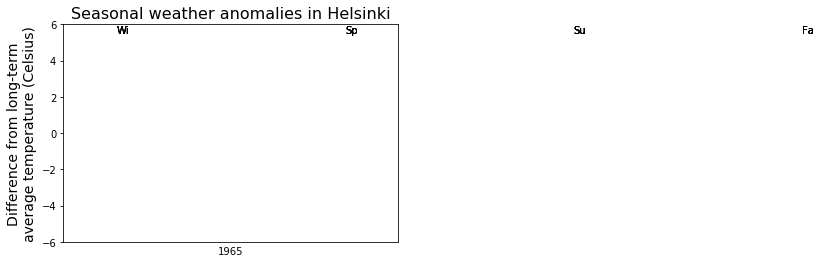

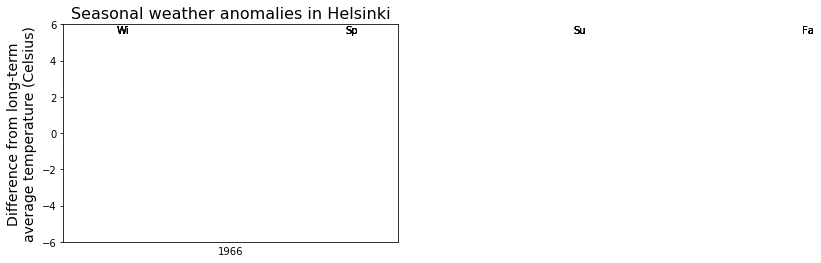

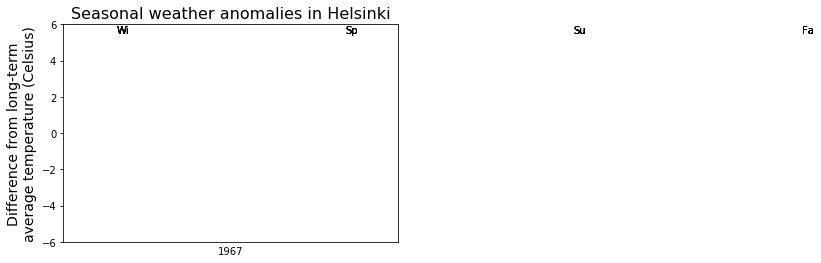

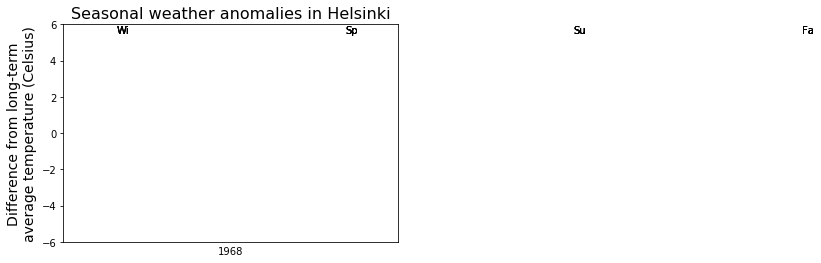

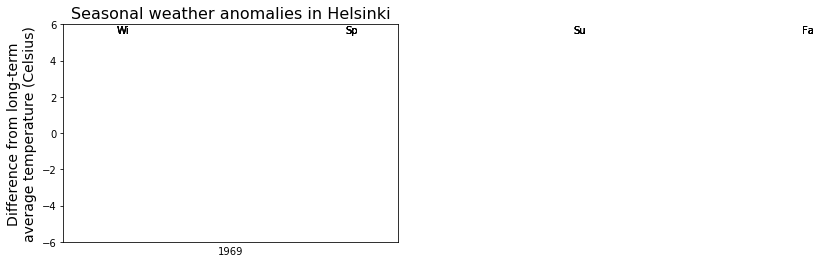

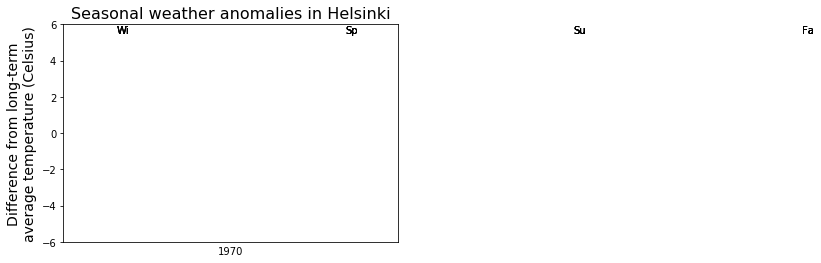

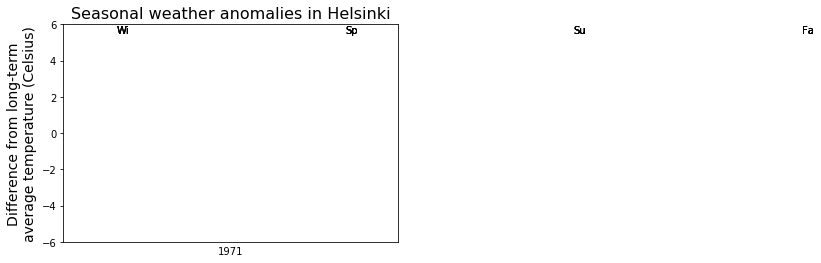

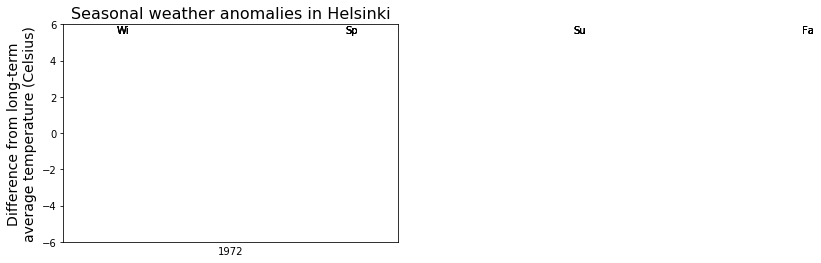

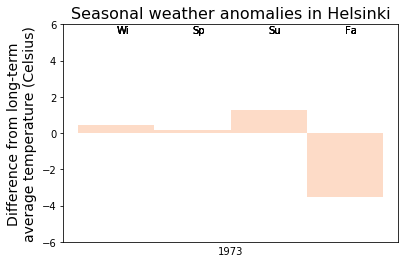

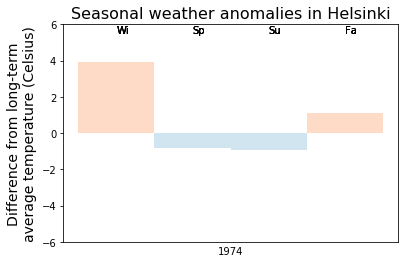

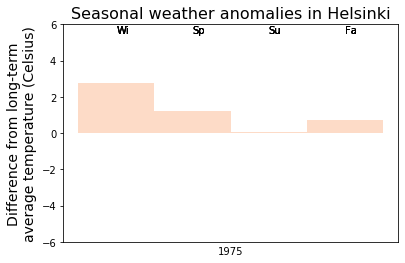

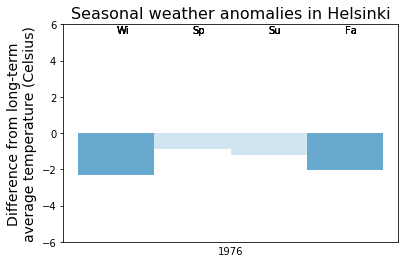

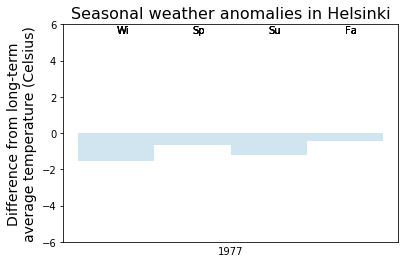

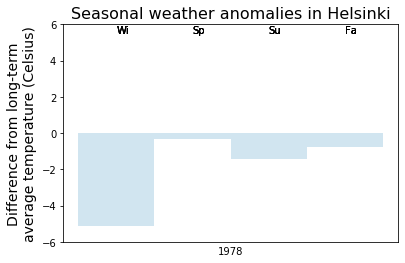

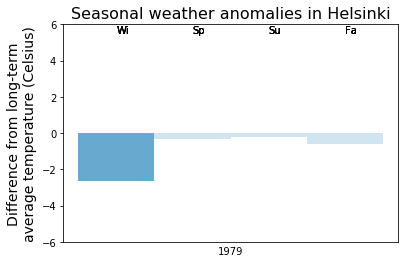

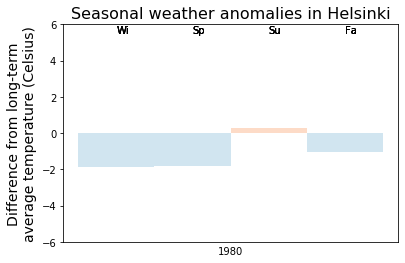

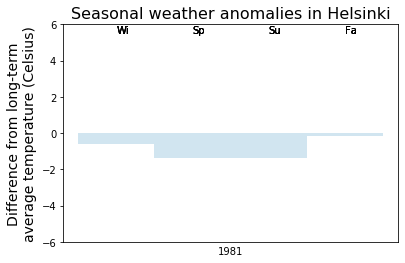

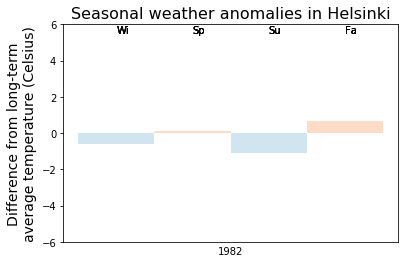

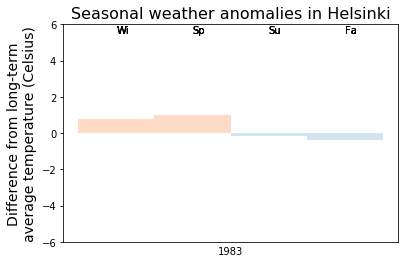

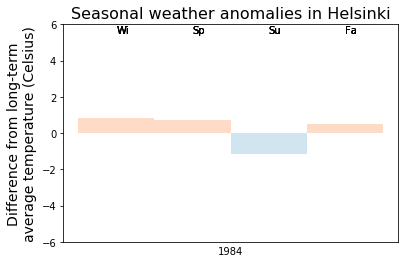

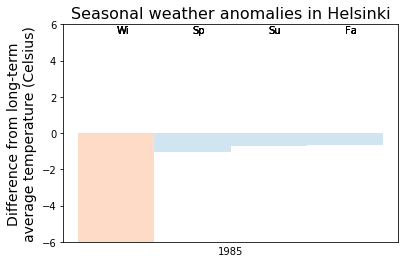

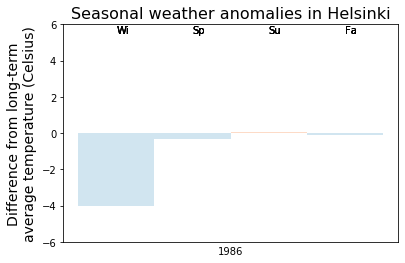

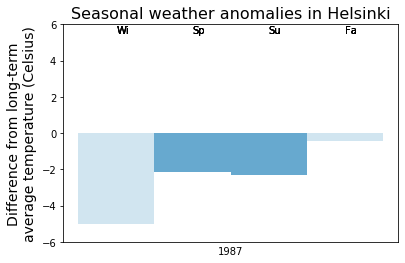

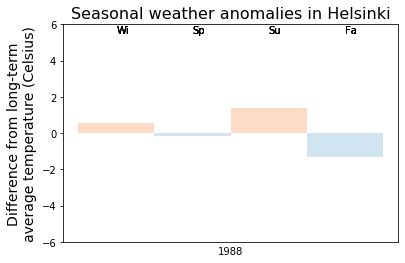

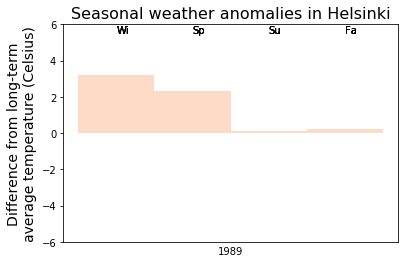

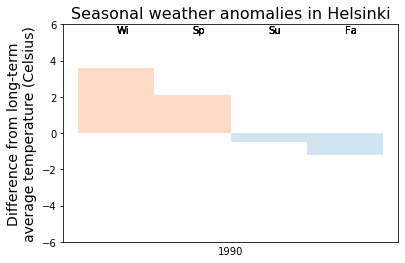

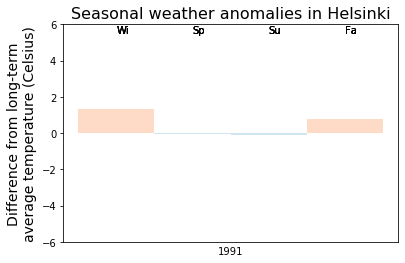

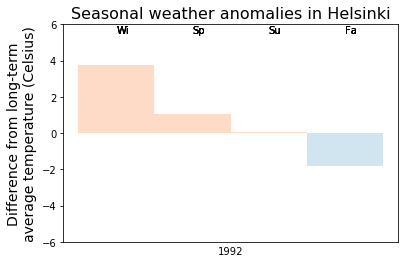

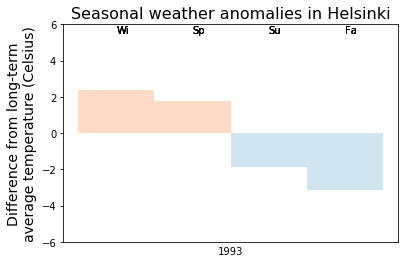

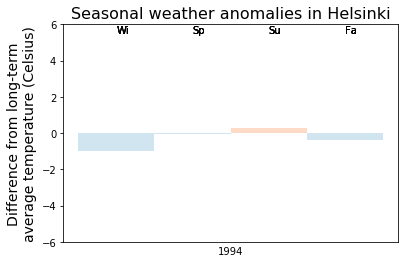

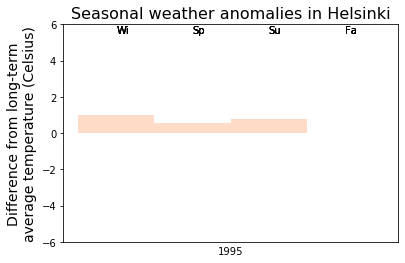

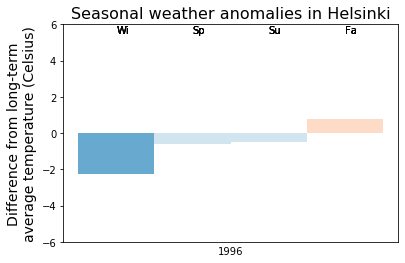

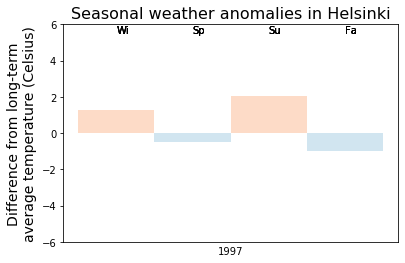

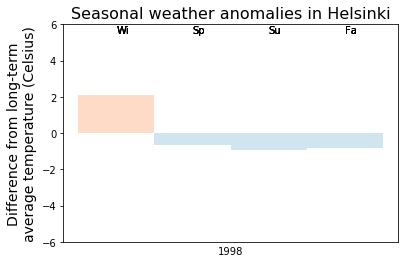

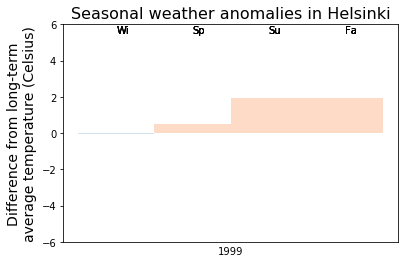

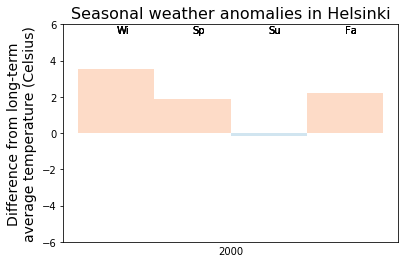

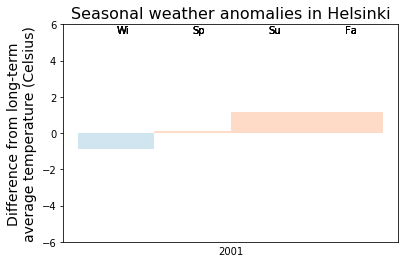

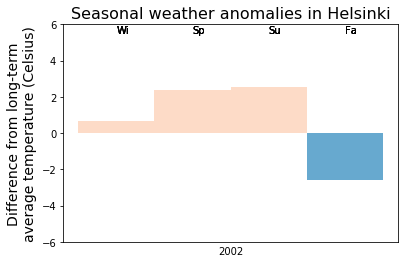

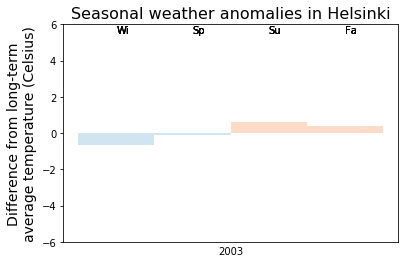

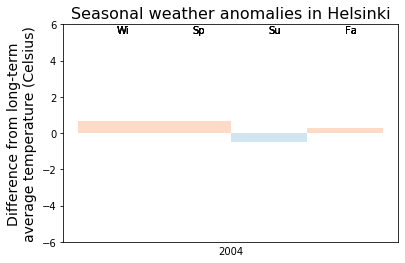

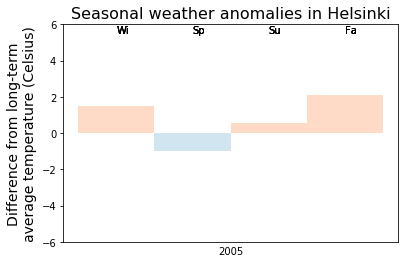

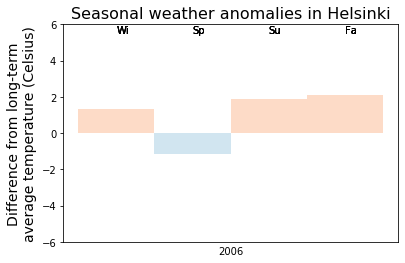

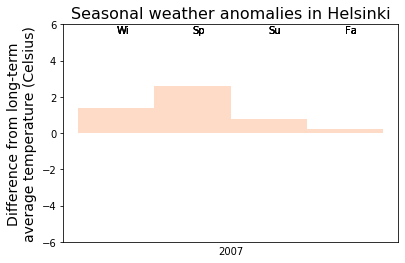

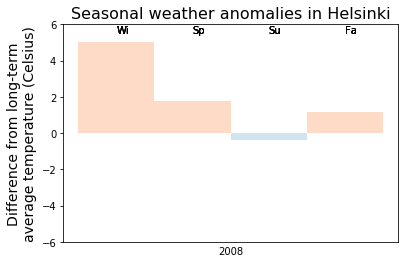

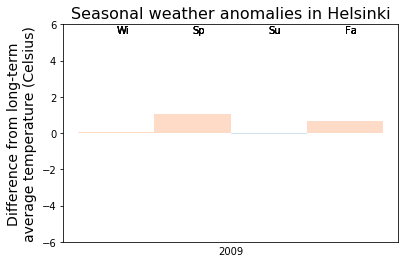

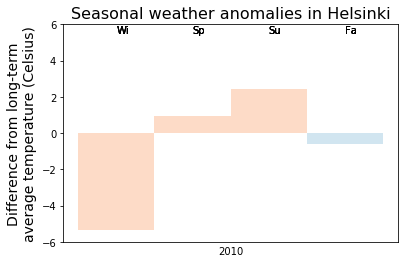

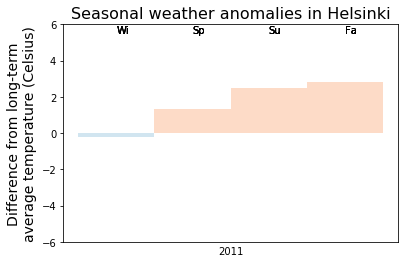

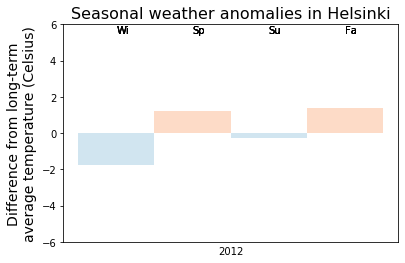

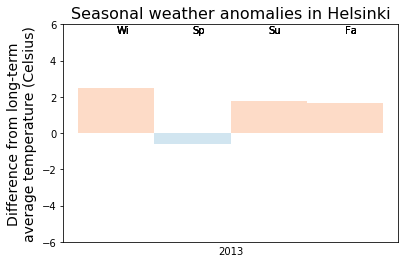

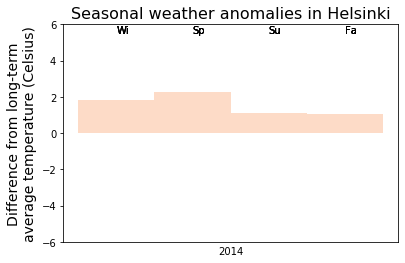

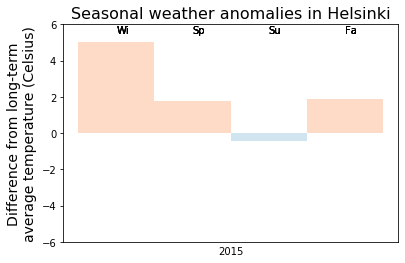

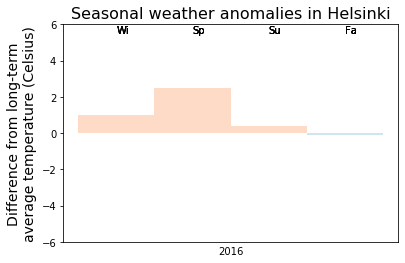

In [16]:
# Initailize variables
start_year = 1953
stop_year = 2017

# Set the year as type integer
winter_agg['Year'] = winter_agg['Year'].astype(int)
spring_agg['Year'] = spring_agg['Year'].astype(int)
summer_agg['Year'] = summer_agg['Year'].astype(int)
fall_agg['Year'] = fall_agg['Year'].astype(int)

# loop for all the years in range
for year in range(start_year, stop_year):
    # Set the average of every year and season
    wi = winter_agg.loc[(winter_agg['Year'] == year), 'Diff'].values[0]
    sp = spring_agg.loc[(spring_agg['Year'] == year), 'Diff'].values[0]
    su = summer_agg.loc[(summer_agg['Year'] == year), 'Diff'].values[0]
    fa = fall_agg.loc[(fall_agg['Year'] == year), 'Diff'].values[0]
    
    # create the list with averages of every season
    seasons = [wi, sp, su, fa]
    # create plot
    figure, ax = plt.subplots()
    # create the bars for every season
    for season in enumerate(seasons):
        # Set color
        if season[1] > 3:
            color = '#b2182b'
        if (season[1] > 2 and season[1] <= 3):
            color = '#ef8a62'
        if (season[1] >= 0 and season[1] <= 2):
            color = '#fddbc7'
        if season[1] >= -3:
            color = '#fddbc7'
        if (season[1] <= -2 and season[1] > -3):
            color = '#67a9cf'
        if (season[1] < 0 and season[1] > -2):
            color = '#d1e5f0'
    
        #Set features
        ax.bar(season[0], season[1], width =1.0, color = color)
        ax.set_ylim(-6, 6)
        ax.set_xticks([], [])
    
        ax.text(0, 5.5, 'Wi')
        ax.text(1, 5.5, 'Sp')
        ax.text(2, 5.5, 'Su')
        ax.text(3, 5.5, 'Fa')
    # Add labels
    ax.set_title('Seasonal weather anomalies in Helsinki', fontsize=16)
    ax.set_xlabel(year)
    ax.set_ylabel('Difference from long-term\naverage temperature (Celsius)', fontsize=14)
    # Save images 
    outfp = "seasonal_anomalies_in_{}.png".format(year)
    figure.savefig(outfp)